<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD11TAR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
warnings.filterwarnings('ignore')

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [ ]:
data = pd.read_csv('housing.csv')

In [ ]:
scaler = StandardScaler()
data[['total_rooms', 'total_bedrooms']] = scaler.fit_transform(data[['total_rooms', 'total_bedrooms']])
data['median_income'] = data['median_income'].astype(int)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,-0.804819,-0.970325,322.0,126.0,8,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2.045890,1.348276,2401.0,1138.0,8,358500.0,NEAR BAY
2,-122.24,37.85,52.0,-0.535746,-0.825561,496.0,177.0,7,352100.0,NEAR BAY
3,-122.25,37.85,52.0,-0.624215,-0.718768,558.0,219.0,5,341300.0,NEAR BAY
4,-122.25,37.85,52.0,-0.462404,-0.611974,565.0,259.0,3,342200.0,NEAR BAY


In [ ]:
X = data.drop(columns = ['longitude', 'median_house_value', 'latitude','population','households']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())

y =  data.loc[:,'median_house_value']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   total_rooms                 20640 non-null  float64
 2   total_bedrooms              20433 non-null  float64
 3   median_income               20640 non-null  int32  
 4   ocean_proximity_INLAND      20640 non-null  bool   
 5   ocean_proximity_ISLAND      20640 non-null  bool   
 6   ocean_proximity_NEAR BAY    20640 non-null  bool   
 7   ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(3), int32(1)
memory usage: 645.1 KB
None


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
representacao_textual = tree.export_text(regr_1)
print(representacao_textual)

|--- feature_3 <= 4.50
|   |--- feature_4 <= 0.50
|   |   |--- value: [207547.50]
|   |--- feature_4 >  0.50
|   |   |--- value: [112101.29]
|--- feature_3 >  4.50
|   |--- feature_3 <= 6.50
|   |   |--- value: [292459.32]
|   |--- feature_3 >  6.50
|   |   |--- value: [428306.99]



In [ ]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,49
O MSE da árvore com profundidade=8 é: 0,68


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

regr_1.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse1

0.5668605971728278

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.492973,0.492973,0.492973,0.492973,0.492973,0.492973,0.492973,0.492973
3,0.566861,0.566861,0.566861,0.566861,0.566861,0.566861,0.566861,0.566861
4,0.601236,0.601236,0.601236,0.601236,0.601236,0.601236,0.601236,0.601236
5,0.615968,0.616578,0.616168,0.616256,0.616038,0.615732,0.616046,0.616046
6,0.627689,0.627741,0.627322,0.627426,0.627415,0.626584,0.627394,0.627394
7,0.633732,0.634200,0.634243,0.634178,0.634857,0.633520,0.634538,0.634604
8,0.635247,0.634654,0.636707,0.637353,0.637826,0.635885,0.637414,0.638171


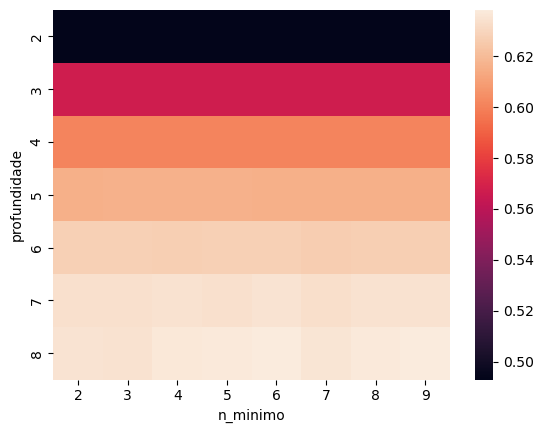

In [ ]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [ ]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 6.05620155e+02, 3.75193798e+03, 5.04683463e+03,
        6.15116279e+03, 9.89179587e+03, 2.01873385e+04, 2.10029070e+04,
        3.73385013e+04, 4.02483850e+04, 6.05620155e+04, 8.46718346e+04,
        1.10537791e+05, 1.16111628e+05, 1.80558247e+05, 2.25441430e+05,
        2.69798557e+05, 3.07049419e+05, 3.09703785e+05, 3.73206772e+05,
        3.84674557e+05, 4.09186531e+05, 4.30671835e+05, 4.32378956e+05,
        4.57515097e+05, 4.65600775e+05, 4.95118435e+05, 4.98229093e+05,
        5.13107050e+05, 5.25072434e+05, 5.87275101e+05, 5.99025001e+05,
        6.33500775e+05, 7.26922997e+05, 7.28689683e+05, 7.33465530e+05,
        8.18661406e+05, 8.19919044e+05, 8.39014426e+05, 8.69153601e+05,
        8.71139810e+05, 9.19068498e+05, 9.47594659e+05, 9.63956649e+05,
        9.64825854e+05, 9.83795592e+05, 1.03086537e+06, 1.09013081e+06,
        1.11583478e+06, 1.11979167e+06, 1.13130732e+06, 1.16606210e+06,
        1.22703083e+06, 1.41894647e+06, 1.43945513

Text(0, 0.5, 'Impureza total das folhas')

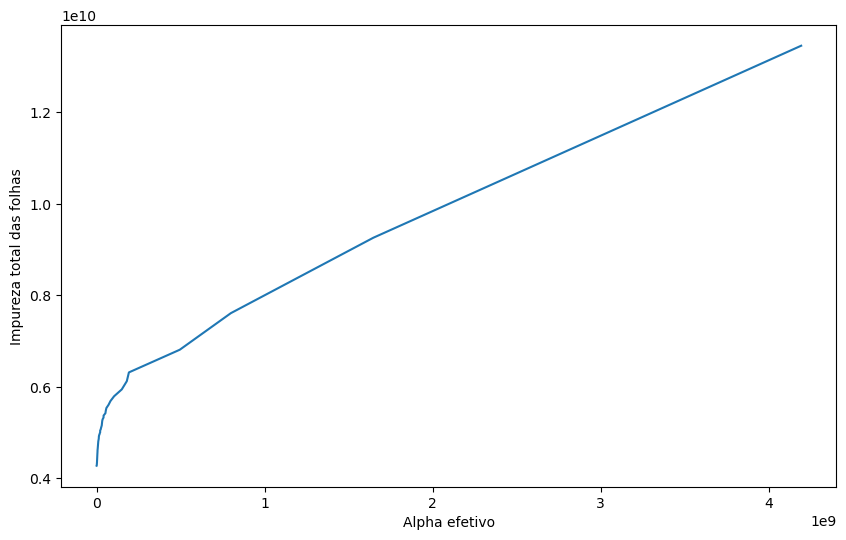

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

Text(0, 0.5, 'Profundidade da árvore')

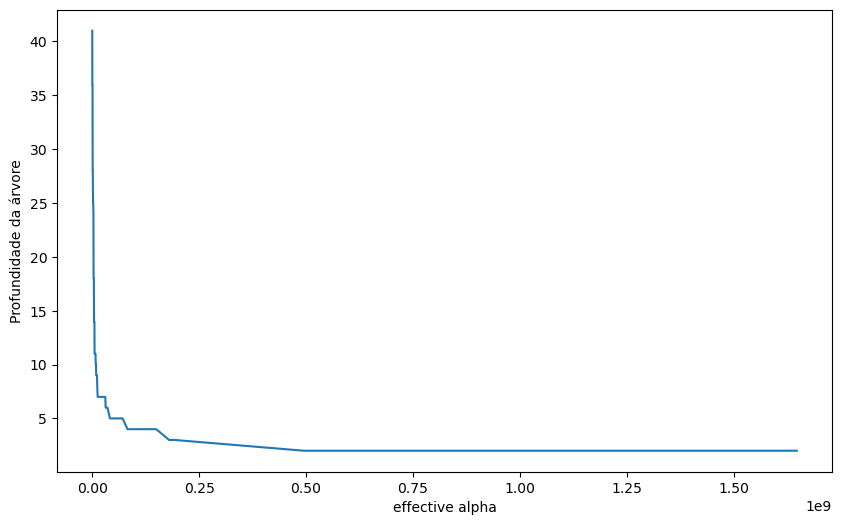

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

Text(0, 0.5, 'Profundidade da árvore')

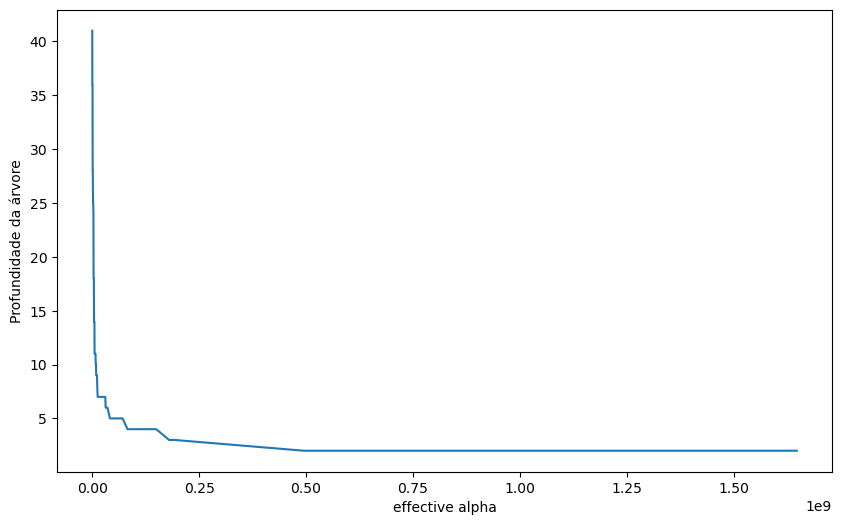

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

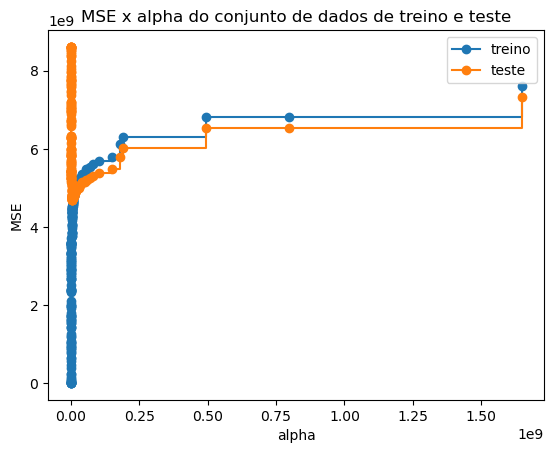

In [ ]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [ ]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
 #Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

### 7. Visualize esta árvore.

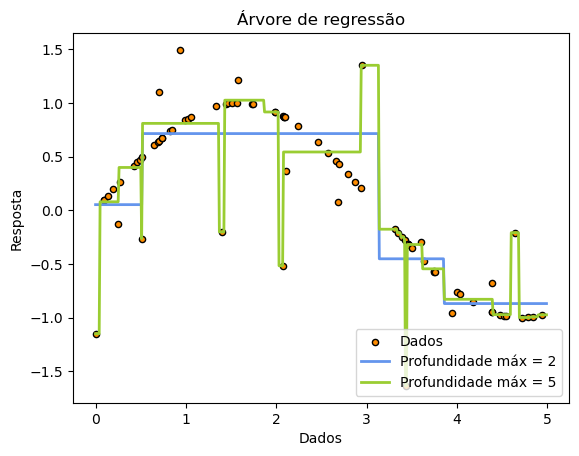

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="Dados")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="Profundidade máx = 2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="Profundidade máx = 5", linewidth=2)
plt.xlabel("Dados")
plt.ylabel("Resposta")
plt.title("Árvore de regressão")
plt.legend()
plt.show()

------------------------------------------------